# Section 4.3 : CYCLICAL MOMENTUM
## Summary
- Learning rate and momentum are closely dependent, and both must be optimised
- Momentum should be set as high as possible without causing instabilities in training
- Momentum cannot be optimised in a similar way to LR, by using a momentum finder
- Optimum settings found to be use of cyclical LR (initially increasing) and cyclical momentum (initially decreasing)
- If constant LR is used, a large (but not too large), constant momentum should be used
- Too large a constant momentum results in instabilities, which are visible in early training

## Momentum in SGD
SGD parameter updates:

$\theta_{iter+1} = \theta_{iter}− \epsilon\delta L(F(x,\theta),\theta),$

where $\theta$ are the parameters, $\epsilon$ is the learning rate, and $L(F(x,\theta),\theta)$ is the gradient. 

Momentum modifies the update rule to:

$\nu_{iter+1} = \alpha\nu_{iter}− \epsilon\delta L(F(x,\theta),\theta)$

$\theta_{iter+1} = \theta_{iter}+\nu_{iter},$

where $\nu$ is velocity, and $\alpha$ is the momentum coefficient, i.e. the effect of $\alpha$ on the update is of the same scale as $\epsilon$.

## Cyclical momentum Example
Let's take the same model and train a few different configurations fo learning rate and momentum:

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data, features = importData()

Training on 250000 datapoints with 31 features:
['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


In [3]:
nFolds = 5
preprocParams = {'normIn':True, 'pca':False}
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'sgd', 'depth':3, 'width':128, 'lr':5e2}
trainParams = {'epochs':20, 'batch_size':256, 'verbose':0}

### Constant LR, Constant Momentum

In [4]:
results_ConstLR_ConstMom85, history_ConstLR_ConstMom85 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                           {'version':'modelRelu', 'nIn':len(features),
                                                                            'compileArgs':{**compileArgs, 'momentum':0.85}},
                                                                           trainParams, useEarlyStop=False, plot=False)

Running fold 1 / 5
Score is: {'loss': 3.3340120704262775e-06, 'AUC': 0.9305421025433017, 'AMS': 3.497703938084724, 'cut': 0.94039065}
Fold took 34.064s

Running fold 2 / 5
Score is: {'loss': 3.382049962001312e-06, 'AUC': 0.9285990622224918, 'AMS': 3.4539341722656163, 'cut': 0.9294152}
Fold took 32.893s

Running fold 3 / 5
Score is: {'loss': 3.325747563103505e-06, 'AUC': 0.9307708779679529, 'AMS': 3.431579003449957, 'cut': 0.91766423}
Fold took 34.008s

Running fold 4 / 5
Score is: {'loss': 3.3347281431609893e-06, 'AUC': 0.9302476505144821, 'AMS': 3.2862819871993607, 'cut': 0.9369413}
Fold took 33.467s

Running fold 5 / 5
Score is: {'loss': 3.3160099931509703e-06, 'AUC': 0.931383461010154, 'AMS': 3.5249408054580247, 'cut': 0.9483267}
Fold took 34.062s


______________________________________
Training finished
Cross-validation took 168.585s 
Mean loss = 3.34e-06 +- 1e-08
Mean AUC = 0.9303 +- 0.0004
Mean AMS = 3.44 +- 0.04
Mean cut = 0.9350000023841858 +- 0.005
___________________________

In [5]:
results_ConstLR_ConstMom90, history_ConstLR_ConstMom90 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                           {'version':'modelRelu', 'nIn':len(features),
                                                                            'compileArgs':{**compileArgs, 'momentum':0.90}},
                                                                           trainParams, useEarlyStop=False, plot=False)

Running fold 1 / 5
Score is: {'loss': 3.3069056274882427e-06, 'AUC': 0.931365414721533, 'AMS': 3.3411749334291954, 'cut': 0.948547}
Fold took 34.621s

Running fold 2 / 5
Score is: {'loss': 3.364221156481927e-06, 'AUC': 0.9293442431537844, 'AMS': 3.3364278926678392, 'cut': 0.9623517}
Fold took 33.778s

Running fold 3 / 5
Score is: {'loss': 3.347824428019521e-06, 'AUC': 0.9302058818027569, 'AMS': 3.571044723001698, 'cut': 0.93751705}
Fold took 34.094s

Running fold 4 / 5
Score is: {'loss': 3.3384899791790544e-06, 'AUC': 0.9301843672700731, 'AMS': 3.2870446126796837, 'cut': 0.9280826}
Fold took 34.153s

Running fold 5 / 5
Score is: {'loss': 3.2670737600408386e-06, 'AUC': 0.9330115970532669, 'AMS': 3.522938562622734, 'cut': 0.93439376}
Fold took 36.713s


______________________________________
Training finished
Cross-validation took 173.455s 
Mean loss = 3.32e-06 +- 2e-08
Mean AUC = 0.9308 +- 0.0006
Mean AMS = 3.41 +- 0.05
Mean cut = 0.9419999718666077 +- 0.005
____________________________

In [6]:
results_ConstLR_ConstMom95, history_ConstLR_ConstMom95 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                           {'version':'modelRelu', 'nIn':len(features),
                                                                            'compileArgs':{**compileArgs, 'momentum':0.95}},
                                                                           trainParams, useEarlyStop=False, plot=False)

Running fold 1 / 5
Score is: {'loss': 3.311218589845491e-06, 'AUC': 0.931571299927326, 'AMS': 3.492773440281554, 'cut': 0.9500043}
Fold took 34.607s

Running fold 2 / 5
Score is: {'loss': 3.2781342517050294e-06, 'AUC': 0.9329128907308276, 'AMS': 3.597448013874875, 'cut': 0.94897425}
Fold took 34.560s

Running fold 3 / 5
Score is: {'loss': 3.3202561654616147e-06, 'AUC': 0.9312364052076108, 'AMS': 3.2517279758324995, 'cut': 0.9339634}
Fold took 35.757s

Running fold 4 / 5
Score is: {'loss': 3.3315405106355656e-06, 'AUC': 0.9305571168080629, 'AMS': 3.41942668991587, 'cut': 0.9344583}
Fold took 35.464s

Running fold 5 / 5
Score is: {'loss': 3.320540493348434e-06, 'AUC': 0.9314236759667714, 'AMS': 3.424406167093527, 'cut': 0.94891244}
Fold took 36.063s


______________________________________
Training finished
Cross-validation took 176.548s 
Mean loss = 3.312e-06 +- 8e-09
Mean AUC = 0.9315 +- 0.0003
Mean AMS = 3.44 +- 0.05
Mean cut = 0.9430000185966492 +- 0.003
_____________________________

In [7]:
results_ConstLR_ConstMom99, history_ConstLR_ConstMom99 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                           {'version':'modelRelu', 'nIn':len(features),
                                                                            'compileArgs':{**compileArgs, 'momentum':0.99}},
                                                                           trainParams, useEarlyStop=False, plot=False)

Running fold 1 / 5
Score is: {'loss': 3.327715769388626e-06, 'AUC': 0.9314058714698179, 'AMS': 3.741470831740165, 'cut': 0.9525193}
Fold took 37.196s

Running fold 2 / 5
Score is: {'loss': 3.257627128411393e-06, 'AUC': 0.9338215215427597, 'AMS': 3.5930799535709856, 'cut': 0.9525203}
Fold took 36.140s

Running fold 3 / 5
Score is: {'loss': 3.2967937735520534e-06, 'AUC': 0.9323222882831352, 'AMS': 3.359303950647835, 'cut': 0.9342164}
Fold took 35.827s

Running fold 4 / 5
Score is: {'loss': 3.3377818726326937e-06, 'AUC': 0.9298227090882503, 'AMS': 3.3416516162504295, 'cut': 0.92325133}
Fold took 36.721s

Running fold 5 / 5
Score is: {'loss': 3.2759923308623964e-06, 'AUC': 0.9327027242538193, 'AMS': 3.6055838336907864, 'cut': 0.9353938}
Fold took 37.827s


______________________________________
Training finished
Cross-validation took 183.823s 
Mean loss = 3.3e-06 +- 1e-08
Mean AUC = 0.932 +- 0.0006
Mean AMS = 3.53 +- 0.07
Mean cut = 0.9399999976158142 +- 0.005
_____________________________

/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


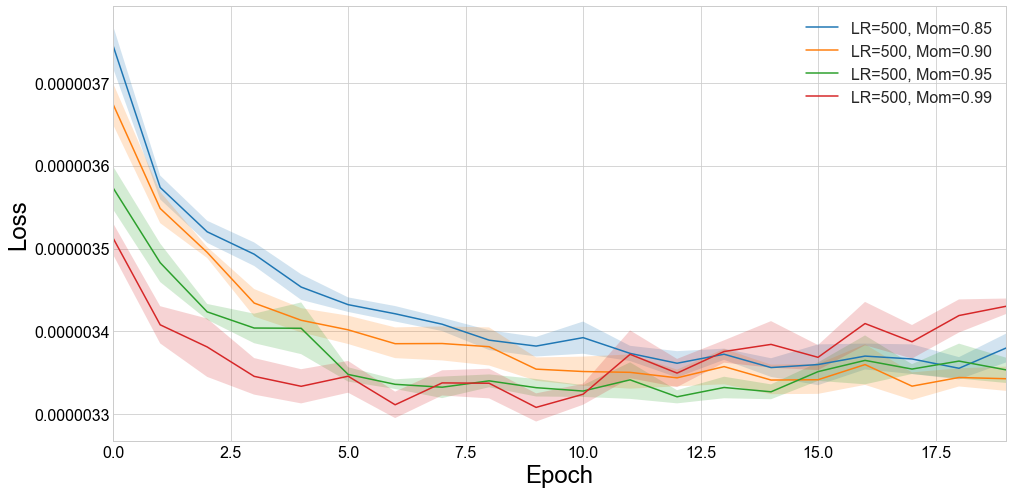

In [8]:
getModelHistoryComparisonPlot([history_ConstLR_ConstMom85, history_ConstLR_ConstMom90, history_ConstLR_ConstMom95, history_ConstLR_ConstMom99],
                              ['LR=500, Mom=0.85', 'LR=500, Mom=0.90', 'LR=500, Mom=0.95', 'LR=500, Mom=0.99'], cv=True)

Similar to the paper, we see that using a constant learning rate requires high values of momentum to converge quickly: as the coefficient is increased, the networks reach their minima in fewer and fewer epochs. At very high momenta (<span style="color:red">red</span>), the network eventually overfits and starts diverging. However it shows slight instability in it's early stages of training, which (as the paper suggests) could be used to catch the eventual overfitting early, and adjust the coefficient.

### Constant LR, Cyclical Momentum

In [11]:
stepScale = 4
results_ConstLR_CycMom95_85, history_ConstLR_CycMom95_85 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                                {'version':'modelRelu', 'nIn':len(features),
                                                                                'compileArgs':compileArgs},
                                                                                trainParams, useEarlyStop=False, plot=False,
                                                                                useCallbacks={'LinearCMom':{'maxMom':0.95,'minMom':0.85,
                                                                                              'scale':stepScale, 'plotMom':False}})

Running fold 1 / 5
Score is: {'loss': 3.3460403440173604e-06, 'AUC': 0.9295006498153942, 'AMS': 3.1839986603050336, 'cut': 0.9232548}
Fold took 42.123s

Running fold 2 / 5
Score is: {'loss': 3.3462021238548176e-06, 'AUC': 0.9303664017111886, 'AMS': 3.3831005494381676, 'cut': 0.9322857}
Fold took 41.392s

Running fold 3 / 5
Score is: {'loss': 3.2976777409567147e-06, 'AUC': 0.9318262809839285, 'AMS': 3.4083969220662995, 'cut': 0.9437586}
Fold took 43.316s

Running fold 4 / 5
Score is: {'loss': 3.3364066231093074e-06, 'AUC': 0.9305879020314013, 'AMS': 3.7315160087908827, 'cut': 0.951997}
Fold took 42.911s

Running fold 5 / 5
Score is: {'loss': 3.2784104389877173e-06, 'AUC': 0.9326896633859305, 'AMS': 3.4719590674007006, 'cut': 0.9355533}
Fold took 44.511s


______________________________________
Training finished
Cross-validation took 214.375s 
Mean loss = 3.32e-06 +- 1e-08
Mean AUC = 0.931 +- 0.0005
Mean AMS = 3.44 +- 0.08
Mean cut = 0.9369999766349792 +- 0.004
__________________________

In [12]:
results_ConstLR_CycMom99_90, history_ConstLR_CycMom99_90 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                                {'version':'modelRelu', 'nIn':len(features),
                                                                                'compileArgs':compileArgs},
                                                                                trainParams, useEarlyStop=False, plot=False,
                                                                                useCallbacks={'LinearCMom':{'maxMom':0.99,'minMom':0.90,
                                                                                              'scale':stepScale, 'plotMom':False}})

Running fold 1 / 5
Score is: {'loss': 3.314200227088141e-06, 'AUC': 0.9316280677830384, 'AMS': 3.451928505791562, 'cut': 0.93192136}
Fold took 42.716s

Running fold 2 / 5
Score is: {'loss': 3.2399980266654114e-06, 'AUC': 0.9345066626696408, 'AMS': 3.6943438279237917, 'cut': 0.9478516}
Fold took 43.281s

Running fold 3 / 5
Score is: {'loss': 3.3161204431235093e-06, 'AUC': 0.9312240220720605, 'AMS': 3.4997803654773865, 'cut': 0.9544763}
Fold took 44.502s

Running fold 4 / 5
Score is: {'loss': 3.2734361624875136e-06, 'AUC': 0.9328394547389964, 'AMS': 3.445156579340614, 'cut': 0.95564306}
Fold took 43.239s

Running fold 5 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115197). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3269415577192857e-06, 'AUC': 0.930751209828862, 'AMS': 3.426221769482501, 'cut': 0.9555312}
Fold took 44.245s


______________________________________
Training finished
Cross-validation took 218.117s 
Mean loss = 3.29e-06 +- 1e-08
Mean AUC = 0.9322 +- 0.0006
Mean AMS = 3.5 +- 0.04
Mean cut = 0.9490000009536743 +- 0.004
______________________________________



In [13]:
results_ConstLR_CycMom99_95, history_ConstLR_CycMom99_95 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                                {'version':'modelRelu', 'nIn':len(features),
                                                                                'compileArgs':compileArgs},
                                                                                trainParams, useEarlyStop=False, plot=False,
                                                                                useCallbacks={'LinearCMom':{'maxMom':0.99,'minMom':0.95,
                                                                                              'scale':stepScale, 'plotMom':False}})

Running fold 1 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103165). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.2814875080671933e-06, 'AUC': 0.9326328218653619, 'AMS': 3.6574733787208076, 'cut': 0.96031415}
Fold took 43.632s

Running fold 2 / 5
Score is: {'loss': 3.2751153529868514e-06, 'AUC': 0.933260482765573, 'AMS': 3.5647128738643565, 'cut': 0.94318783}
Fold took 43.763s

Running fold 3 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105296). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.314095749592525e-06, 'AUC': 0.9310974031034268, 'AMS': 3.540276646011692, 'cut': 0.93563336}
Fold took 44.266s

Running fold 4 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104113). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.2946371359838e-06, 'AUC': 0.9325376969734139, 'AMS': 3.3843352090249406, 'cut': 0.9361759}
Fold took 44.713s

Running fold 5 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106479). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.2891441370652346e-06, 'AUC': 0.9325852704016375, 'AMS': 3.477602227502828, 'cut': 0.9197026}
Fold took 45.402s


______________________________________
Training finished
Cross-validation took 221.918s 
Mean loss = 3.291e-06 +- 6e-09
Mean AUC = 0.9324 +- 0.0003
Mean AMS = 3.52 +- 0.04
Mean cut = 0.9390000104904175 +- 0.006
______________________________________



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


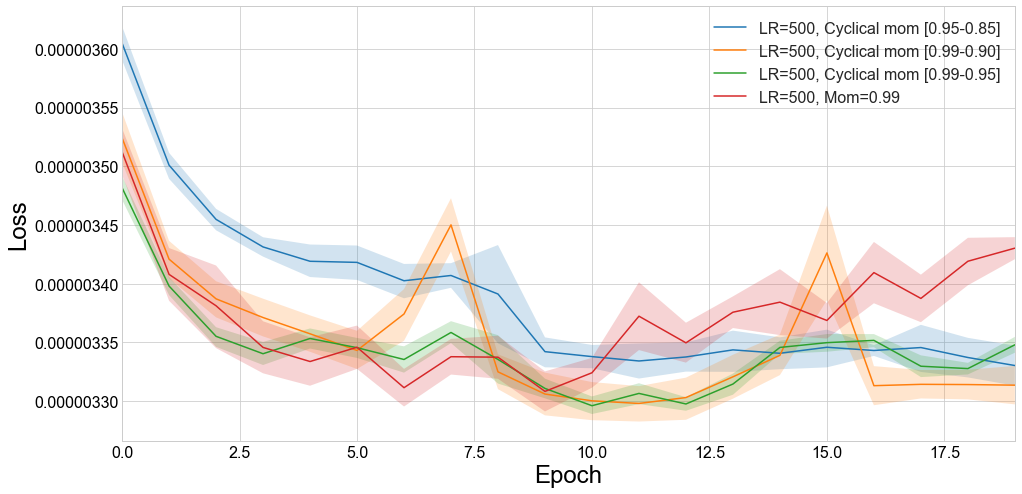

In [27]:
getModelHistoryComparisonPlot([history_ConstLR_CycMom95_85, history_ConstLR_CycMom99_90, history_ConstLR_CycMom99_95, history_ConstLR_ConstMom99],
                              ['LR=500, Cyclical mom [0.95-0.85]', 'LR=500, Cyclical mom [0.99-0.90]', 'LR=500, Cyclical mom [0.99-0.95]', 'LR=500, Mom=0.99'], cv=True)

Here we can see that using a cyclical momentum schedule can be quite unstable (loss fluctuates, possibly an artifact of stepisize), but does provide some resistance to overfitting (late test loss is slow to rise).

Comparing to a constant momentum of 0.99 (<span style="color:red">red</span>) to a cyclical momentum between 0.99 and 0.95 <span style="color:green">green</span>, we can see that the cycling supresses the rise in test loss in late training, and achieves better minima in loss. Initial training is also better, however the artifacts of the scheduling cause mild divergence around epochs 7 and 15, preventing the network from convereging earlier than might otherwise be possible.

As the width of the cycle is increased (<span style="color:green">green</span> to  <span style="color:orange">orange</span>), these artifacts become more apparent as the mild diveregnces become sharp spikes.

### Cyclical LR, Constant Momentum

In [16]:
stepScale = 4
results_CycLR_ConstMom85, history_CycLR_ConstMom85 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                          {'version':'modelRelu', 'nIn':len(features),
                                                                           'compileArgs':{**compileArgs, 'momentum':0.85}},
                                                                          trainParams, useEarlyStop=False, plot=False,
                                                                          useCallbacks={'LinearCLR':{'maxLR':5e2,'minLR':5e1,
                                                                                                     'scale':stepScale, 'plotLR':False}})

Running fold 1 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117727). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.341375306981667e-06, 'AUC': 0.9300934295362964, 'AMS': 3.43896333551681, 'cut': 0.922411}
Fold took 46.381s

Running fold 2 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116596). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3607009027929033e-06, 'AUC': 0.9292939409238298, 'AMS': 3.281312811860066, 'cut': 0.9222226}
Fold took 47.115s

Running fold 3 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118183). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3745647629257292e-06, 'AUC': 0.9288978058169532, 'AMS': 3.3425104103907746, 'cut': 0.93473184}
Fold took 48.738s

Running fold 4 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121303). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.333841363232187e-06, 'AUC': 0.9303757408823288, 'AMS': 3.4201918207402677, 'cut': 0.9383646}
Fold took 48.216s

Running fold 5 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124282). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.402588648492084e-06, 'AUC': 0.9275751321788333, 'AMS': 3.257623994334322, 'cut': 0.9091302}
Fold took 46.519s


______________________________________
Training finished
Cross-validation took 237.107s 
Mean loss = 3.36e-06 +- 1e-08
Mean AUC = 0.9292 +- 0.0004
Mean AMS = 3.35 +- 0.03
Mean cut = 0.925000011920929 +- 0.005
______________________________________



In [17]:
results_CycLR_ConstMom90, history_CycLR_ConstMom90 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                          {'version':'modelRelu', 'nIn':len(features),
                                                                           'compileArgs':{**compileArgs, 'momentum':0.90}},
                                                                          trainParams, useEarlyStop=False, plot=False,
                                                                          useCallbacks={'LinearCLR':{'maxLR':5e2,'minLR':5e1,
                                                                                                     'scale':stepScale, 'plotLR':False}})

Running fold 1 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126869). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3426453576646368e-06, 'AUC': 0.9304004931457469, 'AMS': 3.487037469973794, 'cut': 0.93871355}
Fold took 46.022s

Running fold 2 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131162). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3668543263005485e-06, 'AUC': 0.92911806581426, 'AMS': 3.459172959083015, 'cut': 0.9296908}
Fold took 46.817s

Running fold 3 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130732). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.2794552357518112e-06, 'AUC': 0.9324383969686387, 'AMS': 3.39207509077089, 'cut': 0.9058156}
Fold took 47.288s

Running fold 4 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137114). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.349796416666519e-06, 'AUC': 0.9299129489801208, 'AMS': 3.3612320616482987, 'cut': 0.94305193}
Fold took 47.385s

Running fold 5 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142578). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.349241271325301e-06, 'AUC': 0.9298647649588505, 'AMS': 3.3468229398803166, 'cut': 0.9087912}
Fold took 49.392s


______________________________________
Training finished
Cross-validation took 237.062s 
Mean loss = 3.34e-06 +- 1e-08
Mean AUC = 0.9303 +- 0.0005
Mean AMS = 3.41 +- 0.02
Mean cut = 0.925000011920929 +- 0.007
______________________________________



In [18]:
results_CycLR_ConstMom95, history_CycLR_ConstMom95 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                          {'version':'modelRelu', 'nIn':len(features),
                                                                           'compileArgs':{**compileArgs, 'momentum':0.95}},
                                                                          trainParams, useEarlyStop=False, plot=False,
                                                                          useCallbacks={'LinearCLR':{'maxLR':5e2,'minLR':5e1,
                                                                                                     'scale':stepScale, 'plotLR':False}})

Running fold 1 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147693). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.278763712467906e-06, 'AUC': 0.9331622500714725, 'AMS': 3.6928518994852206, 'cut': 0.96640056}
Fold took 50.120s

Running fold 2 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149963). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3271506646662027e-06, 'AUC': 0.9312369877160993, 'AMS': 3.498657509197736, 'cut': 0.9375993}
Fold took 51.390s

Running fold 3 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154574). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3212528570584256e-06, 'AUC': 0.9305461994637407, 'AMS': 3.2673878065636277, 'cut': 0.9186098}
Fold took 48.452s

Running fold 4 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160501). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.31182033344186e-06, 'AUC': 0.9317348977826199, 'AMS': 3.4639328259659594, 'cut': 0.9679372}
Fold took 48.263s

Running fold 5 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152582). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3312308399543932e-06, 'AUC': 0.9309644987606029, 'AMS': 3.496652571106536, 'cut': 0.9299338}
Fold took 49.187s


______________________________________
Training finished
Cross-validation took 247.554s 
Mean loss = 3.314e-06 +- 8e-09
Mean AUC = 0.9315 +- 0.0004
Mean AMS = 3.48 +- 0.06
Mean cut = 0.9440000057220459 +- 0.009
______________________________________



In [19]:
results_CycLR_ConstMom99, history_CycLR_ConstMom99 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                          {'version':'modelRelu', 'nIn':len(features),
                                                                           'compileArgs':{**compileArgs, 'momentum':0.99}},
                                                                          trainParams, useEarlyStop=False, plot=False,
                                                                          useCallbacks={'LinearCLR':{'maxLR':5e2,'minLR':5e1,
                                                                                                     'scale':stepScale, 'plotLR':False}})

Running fold 1 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158822). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.2266356479083064e-06, 'AUC': 0.9350876662532194, 'AMS': 3.4831915925078656, 'cut': 0.9418866}
Fold took 50.146s

Running fold 2 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165468). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3179712474663173e-06, 'AUC': 0.9320178373101935, 'AMS': 3.6752672729528357, 'cut': 0.95253617}
Fold took 51.712s

Running fold 3 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166893). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.313764196500415e-06, 'AUC': 0.9313175297863996, 'AMS': 3.577372768735527, 'cut': 0.9462131}
Fold took 49.255s

Running fold 4 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177666). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.27371026970709e-06, 'AUC': 0.9329796850149376, 'AMS': 3.410513456514986, 'cut': 0.93514293}
Fold took 50.881s

Running fold 5 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173972). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3010072800996174e-06, 'AUC': 0.9320653716877705, 'AMS': 3.559974794301139, 'cut': 0.95981735}
Fold took 50.973s


______________________________________
Training finished
Cross-validation took 253.118s 
Mean loss = 3.29e-06 +- 2e-08
Mean AUC = 0.9327 +- 0.0006
Mean AMS = 3.54 +- 0.04
Mean cut = 0.9470000267028809 +- 0.004
______________________________________



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


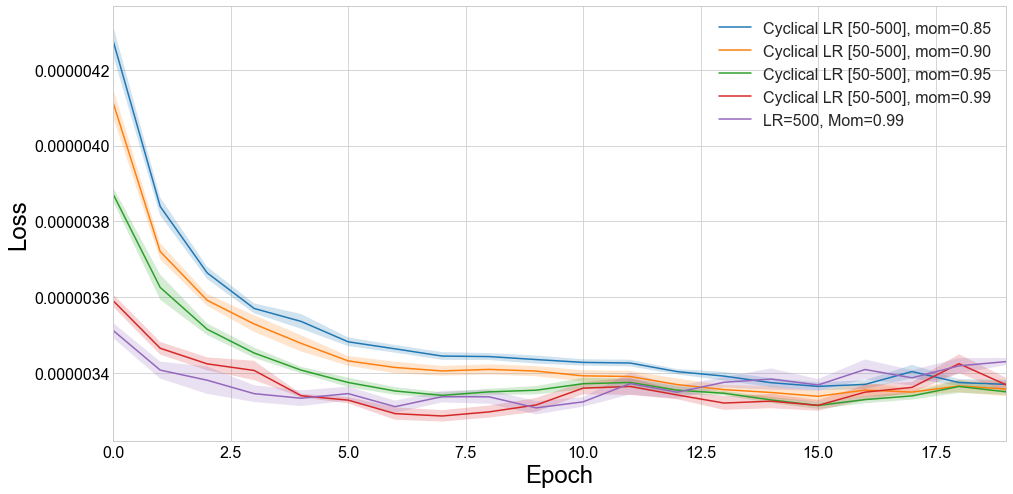

In [20]:
getModelHistoryComparisonPlot([history_CycLR_ConstMom85, history_CycLR_ConstMom90, history_CycLR_ConstMom95, history_CycLR_ConstMom99, history_ConstLR_ConstMom99],
                              ['Cyclical LR [50-500], mom=0.85', 'Cyclical LR [50-500], mom=0.90', 'Cyclical LR [50-500], mom=0.95', 'Cyclical LR [50-500], mom=0.99', 'LR=500, Mom=0.99'], cv=True)

Here we see that moving to a cyclical LR schedule might help reduce the instability of using very high momenta. Comparing <span style="color:red">red</span> to <span style="color:purple">purple</span>, we find that the cyclical LR gives a slightly smoother loss evolution, reaches a better loss, and supresses the late-stage overfitting.

### Cyclical LR, cyclical Momentum

In [21]:
stepScale = 4
results_CycLR_CycMom95_85, history_CycLR_CycMom95_85 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                            {'version':'modelRelu', 'nIn':len(features),
                                                                             'compileArgs':compileArgs},
                                                                            trainParams, useEarlyStop=False, plot=False,
                                                                            useCallbacks={'LinearCLR':{'maxLR':5e2,'minLR':5e1,
                                                                                                       'scale':stepScale, 'plotLR':False},
                                                                                          'LinearCMom':{'maxMom':0.95,'minMom':0.85,
                                                                                                        'scale':stepScale, 'plotMom':False}})

Running fold 1 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.367985). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.383314100097896e-06, 'AUC': 0.9284111000936635, 'AMS': 3.257484627838797, 'cut': 0.904643}
Fold took 59.863s

Running fold 2 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.342738). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.330987463142306e-06, 'AUC': 0.9307678698642007, 'AMS': 3.4911503815374965, 'cut': 0.9332075}
Fold took 57.962s

Running fold 3 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.366897). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3647674483654554e-06, 'AUC': 0.929143741164359, 'AMS': 3.3709444715544126, 'cut': 0.9535255}
Fold took 59.545s

Running fold 4 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.357401). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.326530024472814e-06, 'AUC': 0.9305385474404223, 'AMS': 3.4677820582574688, 'cut': 0.9405889}
Fold took 59.954s

Running fold 5 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.366648). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3407943971776276e-06, 'AUC': 0.9305519694771099, 'AMS': 3.5301470595887166, 'cut': 0.9526717}
Fold took 59.499s


______________________________________
Training finished
Cross-validation took 296.983s 
Mean loss = 3.349e-06 +- 1e-08
Mean AUC = 0.9299 +- 0.0004
Mean AMS = 3.42 +- 0.04
Mean cut = 0.9369999766349792 +- 0.008
______________________________________



In [22]:
results_CycLR_CycMom99_90, history_CycLR_CycMom99_90 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                            {'version':'modelRelu', 'nIn':len(features),
                                                                             'compileArgs':compileArgs},
                                                                            trainParams, useEarlyStop=False, plot=False,
                                                                            useCallbacks={'LinearCLR':{'maxLR':5e2,'minLR':5e1,
                                                                                                       'scale':stepScale, 'plotLR':False},
                                                                                          'LinearCMom':{'maxMom':0.99,'minMom':0.90,
                                                                                                        'scale':stepScale, 'plotMom':False}})

Running fold 1 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.376289). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3339730611597146e-06, 'AUC': 0.9301103840598541, 'AMS': 3.2743275660150903, 'cut': 0.9332891}
Fold took 59.154s

Running fold 2 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.401801). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3713584009862956e-06, 'AUC': 0.9290155151372417, 'AMS': 3.3953001457743013, 'cut': 0.92543894}
Fold took 60.124s

Running fold 3 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.396544). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.2959623833812655e-06, 'AUC': 0.9322962770616889, 'AMS': 3.493426126818527, 'cut': 0.94098043}
Fold took 59.673s

Running fold 4 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.403488). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3054454136125467e-06, 'AUC': 0.9318429385075814, 'AMS': 3.4912303500828266, 'cut': 0.9491267}
Fold took 60.463s

Running fold 5 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.432442). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3300190159912525e-06, 'AUC': 0.9305808256703973, 'AMS': 3.407431534331025, 'cut': 0.9429768}
Fold took 61.051s


______________________________________
Training finished
Cross-validation took 300.620s 
Mean loss = 3.33e-06 +- 1e-08
Mean AUC = 0.9308 +- 0.0005
Mean AMS = 3.41 +- 0.04
Mean cut = 0.9380000233650208 +- 0.004
______________________________________



In [23]:
results_CycLR_CycMom99_95, history_CycLR_CycMom99_95 = cvTrainClassifier(data, features, nFolds, preprocParams,
                                                                            {'version':'modelRelu', 'nIn':len(features),
                                                                             'compileArgs':compileArgs},
                                                                            trainParams, useEarlyStop=False, plot=False,
                                                                            useCallbacks={'LinearCLR':{'maxLR':5e2,'minLR':5e1,
                                                                                                       'scale':stepScale, 'plotLR':False},
                                                                                          'LinearCMom':{'maxMom':0.99,'minMom':0.95,
                                                                                                        'scale':stepScale, 'plotMom':False}})

Running fold 1 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.426049). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3391777953317944e-06, 'AUC': 0.931027109337726, 'AMS': 3.5461090843067438, 'cut': 0.9390188}
Fold took 63.538s

Running fold 2 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.415316). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3058100583803314e-06, 'AUC': 0.9316729059723297, 'AMS': 3.4871443175726298, 'cut': 0.9542402}
Fold took 62.498s

Running fold 3 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.454763). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3138931246503487e-06, 'AUC': 0.9316579319217021, 'AMS': 3.537045100422944, 'cut': 0.9412218}
Fold took 64.084s

Running fold 4 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.432233). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.2919377197104175e-06, 'AUC': 0.9314715717626716, 'AMS': 3.4236812535658863, 'cut': 0.93522966}
Fold took 62.697s

Running fold 5 / 5


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.439615). Check your callbacks.
  % delta_t_median)


Score is: {'loss': 3.3420458123415526e-06, 'AUC': 0.930095952979728, 'AMS': 3.3334540005234956, 'cut': 0.944509}
Fold took 63.157s


______________________________________
Training finished
Cross-validation took 316.144s 
Mean loss = 3.319e-06 +- 9e-09
Mean AUC = 0.9312 +- 0.0003
Mean AMS = 3.47 +- 0.04
Mean cut = 0.9430000185966492 +- 0.003
______________________________________



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


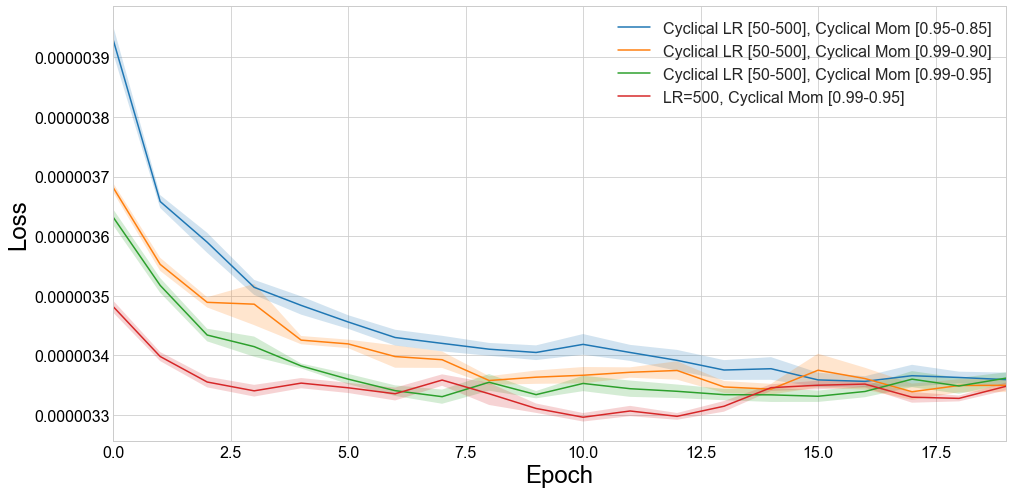

In [28]:
getModelHistoryComparisonPlot([history_CycLR_CycMom95_85, history_CycLR_CycMom99_90, history_CycLR_CycMom99_95, history_ConstLR_CycMom99_95],
                              ['Cyclical LR [50-500], Cyclical Mom [0.95-0.85]', 'Cyclical LR [50-500], Cyclical Mom [0.99-0.90]', 'Cyclical LR [50-500], Cyclical Mom [0.99-0.95]', 'LR=500, Cyclical Mom [0.99-0.95]'], cv=True)

Comparing the best CLR+CM setup (<span style="color:green">green</span>) to the  fixed LR+CM setup (<span style="color:red">red</span>) it seems that cycling the lR degrades the performance of the network (best loss is higher), however the network never overfits; unlink the <span style="color:red">red</span> line, it reaches it's minima after 7 epochs and then plateus. It's possible that the stability might actually be a consequence of underfitting, in which case the learning rate could perhaps be increased.

### Comparison

/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


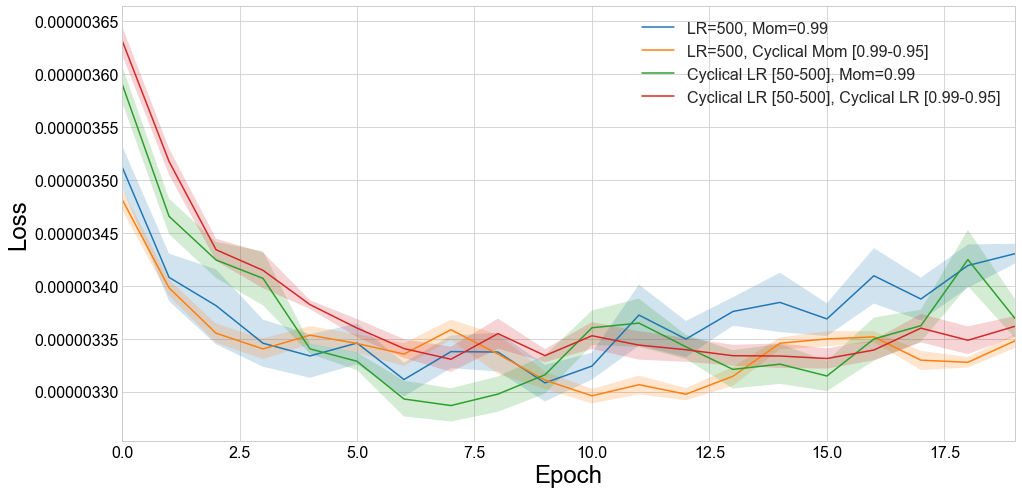

In [30]:
getModelHistoryComparisonPlot([history_ConstLR_ConstMom99, history_ConstLR_CycMom99_95, history_CycLR_ConstMom99, history_CycLR_CycMom99_95],
                              ['LR=500, Mom=0.99', 'LR=500, Cyclical Mom [0.99-0.95]', 'Cyclical LR [50-500], Mom=0.99', 'Cyclical LR [50-500], Cyclical LR [0.99-0.95]'], cv=True)

Comparing the best performing setups from each sechudle configuration it seems that of the hyperparameters tested, for this dataset and architecture, a cycled LR with a constant momentum (<span style="color:green">green</span>) provides the lowest loss, but eventually overfits.

Cycling the momentum and keeping the LR constant (<span style="color:orange">orange</span>) reaches almost as good a loss, but after 40% more epochs, and although it later provides less overfitting, it does suffer from regular peaks and troughs due to the cycling.

Cycling both the LR and the momentum (<span style="color:red">red</span>) causes convergence in the same number of epochs as (<span style="color:orange">orange</span>), but at a higher loss. Having reached its minimum, the test loss then remains flat, possibly indicating that with further adjustments of the hyperparameters it might provide superior performance to (<span style="color:orange">orange</span>).